## Introducción al uso de la API de Reddit para Extracción de Datos

La API de Reddit, integrada a través de la biblioteca praw en Python, proporciona acceso programático a los contenidos y datos disponibles en Reddit, una plataforma social muy popular que alberga una gran variedad de comunidades (llamadas subreddits) dedicadas a diversos temas, incluidos los videojuegos.

### Propósito y Funcionalidad

El propósito principal de utilizar la API de Reddit en conjunción con praw es la extracción automatizada de datos específicos de Reddit, como publicaciones, comentarios, y detalles asociados, basados en criterios de búsqueda predefinidos. En el contexto de análisis de videojuegos y publicidades:

- *Extracción de Publicaciones:* Permite obtener publicaciones específicas relacionadas con términos clave como "advertisement", "ad", "marketing", o "promo" en subreddits relevantes como r/gaming.
  
- *Recopilación de Datos:* Facilita la recolección de información como títulos de publicaciones, autores, puntajes (score), número de comentarios, URLs y fechas de creación.

### Configuración y Uso

Para utilizar la API de Reddit con praw, es necesario configurarla con credenciales específicas de la aplicación (cliente ID y cliente secreto), junto con un agente de usuario único que identifica tu aplicación para Reddit.

### Ejemplo Práctico

El siguiente ejemplo muestra cómo configurar y utilizar la API de Reddit para extraer datos de publicaciones relacionadas con publicidades en videojuegos desde el subreddit r/gaming:

In [1]:
!pip install praw

# Extracción de Publicaciones de Publicidad en Videojuegos desde Reddit

Este script está diseñado para extraer publicaciones de Reddit relacionadas con publicidades de videojuegos y guardar los datos en un archivo CSV. A continuación, se explica en detalle cada parte del código.

## Configuración de la API de Reddit

Primero, configuramos la conexión a la API de Reddit utilizando `praw` (Python Reddit API Wrapper). Esto se hace proporcionando el `client_id`, `client_secret` y `user_agent`.

In [2]:
import praw
import csv
import datetime

# Configuración de la API de Reddit
reddit = praw.Reddit(
    client_id='46K3g9wdgnG6N-EULyNyCA',
    client_secret='Wu0ex80UAuqV9fv6xkN2wkCIZ-NR6Q',
    user_agent='Traditional-Can3255'
)

# Define el subreddit y el término de búsqueda
subreddit_name = 'gaming'  # Puedes cambiar a otros subreddits relacionados con videojuegos
search_term = 'advertisement OR ad OR marketing OR promo'  # Términos de búsqueda para encontrar publicidades

# Extrae publicaciones relacionadas con videojuegos
subreddit = reddit.subreddit(subreddit_name)
posts = subreddit.search(search_term, sort='relevant', time_filter='all', limit=100)  # Cambia el límite según tus necesidades

# Archivo CSV para guardar los datos extraídos
csv_file = 'video_game_advertisements.csv'

# Abrir el archivo CSV para escribir datos
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Author', 'Score', 'Comments', 'URL', 'Date'])  # Cabeceras de columnas

    for post in posts:
        # Extraer datos de cada publicación
        title = post.title
        author = post.author.name if post.author else 'Unknown'
        score = post.score
        comments = post.num_comments
        url = post.url
        date = datetime.datetime.fromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')

        # Escribir los datos en el archivo CSV
        writer.writerow([title, author, score, comments, url, date])

print(f'Datos extraídos y guardados en {csv_file}')


Datos extraídos y guardados en video_game_advertisements.csv


In [3]:
import pandas as pd
VJ = pd.read_csv('video_game_advertisements.csv')
VJ

,Title,Author,Score,Comments,URL,Date
0,Saw a piece of advertising history.,InvadingBacon,1843,35,https://i.redd.it/1dqjd4jkn6qc1.jpeg,2024-03-23 20:14:08
1,Found this advertisement today,Lxlith_s,14763,1214,https://www.reddit.com/gallery/u72rek,2022-04-19 06:19:51
2,PSP advertisement from the Netherlands,DevilUnknown17,9344,637,https://i.redd.it/cjerjwasljz81.jpg,2022-05-14 20:29:11
3,Fable • Xbox • 2004 • Advertisement,TurboTBag,5225,440,https://i.redd.it/9qo9rdzs7jja1.jpg,2023-02-21 02:02:26
4,90's Video-game Advertisement....,Cooper3b,25931,625,http://i.imgur.com/R7gHPYp.jpg,2017-05-30 00:34:51
...,...,...,...,...,...,...
95,‘Helldivers 2’ Is a Surprise Hit for Sony in a...,TillI_Collapse,10339,1041,https://www.bloomberg.com/news/newsletters/202...,2024-03-15 14:13:37
96,Found this ad in a Nickelodeon magazine from 2...,bluefootednewt,18446,808,http://i.imgur.com/IsbWCSc.jpg,2014-07-19 21:40:00
97,7 player Smash at the airport. My life is offi...,Themris,70264,1244,https://i.redd.it/9tcsfxaiwj331.jpg,2019-06-10 10:55:17
98,Not even advertising it as DLC anymore...,wasabi324,2179,491,http://i.imgur.com/yOqZYgm.png,2014-06-10 05:08:37


# Análisis de Publicaciones de Publicidad en Videojuegos desde Reddit por Año

Este script complementa el anterior, analizando las publicaciones extraídas de Reddit y calculando estadísticas anuales. A continuación, se explica en detalle cada parte del código.

## Importación de Librerías y Lectura de Datos

Primero, importamos las librerías necesarias (`praw`, `csv`, `datetime`, `pandas`) y leemos los datos desde el archivo CSV generado en el script anterior.


In [4]:
import praw
import csv
import datetime
import pandas as pd
# Leer datos desde el archivo CSV
data = pd.read_csv('video_game_advertisements.csv')

# Convertir la columna 'Date' a tipo datetime y extraer el año
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# Calcular el promedio de puntaje y comentarios por año
yearly_stats = data.groupby('Year').agg({'Score': 'mean', 'Comments': 'mean'}).reset_index()
yearly_stats.rename(columns={'Score': 'Average_Score', 'Comments': 'Average_Comments'}, inplace=True)

# Archivo CSV para guardar los promedios por año
yearly_csv_file = 'yearly_video_game_ad_stats.csv'

# Guardar los datos en un nuevo archivo CSV
yearly_stats.to_csv(yearly_csv_file, index=False, encoding='utf-8')

print(f'Datos de promedios por año guardados en {yearly_csv_file}')


Datos de promedios por año guardados en yearly_video_game_ad_stats.csv


In [5]:
yj = pd.read_csv('yearly_video_game_ad_stats.csv')
yj

,Year,Average_Score,Average_Comments
0,2009,551.000000,357.000000
1,2011,4227.000000,1787.000000
2,2012,1592.000000,357.000000
3,2013,1915.000000,327.500000
4,2014,8913.307692,814.000000
5,2015,13621.714286,993.285714
6,2016,20839.125000,1577.125000
7,2017,17506.000000,503.500000
8,2018,31587.000000,676.285714
9,2019,48280.666667,1192.666667


# Generación de Gráficos para Publicaciones de Publicidad en Videojuegos desde Reddit

Este script utiliza los datos procesados previamente para crear gráficos visuales que muestran la distribución de puntajes de las publicaciones y las estadísticas anuales promedio. A continuación, se explica en detalle cada parte del código.

## Importación de Librerías y Lectura de Datos

Primero, importamos las librerías necesarias (`pandas`, `matplotlib`, `os`) y leemos los datos desde el archivo CSV de promedios por año.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os

# Leer datos desde el archivo CSV de promedios por año
yearly_stats = pd.read_csv('yearly_video_game_ad_stats.csv')

# Gráfico de distribución de puntajes
plt.figure(figsize=(10, 5))
plt.hist(data['Score'], bins=30, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of Posts')
plt.title('Distribución de Puntajes de Publicaciones de Videojuegos')
plt.tight_layout()
plt.savefig('score_distribution.png')  # Guardar el gráfico como una imagen
plt.close()

# Crear gráfico de líneas para promedios por año
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats['Year'], yearly_stats['Average_Score'], marker='o', linestyle='-', color='blue', label='Promedio de Puntajes')
plt.plot(yearly_stats['Year'], yearly_stats['Average_Comments'], marker='o', linestyle='-', color='green', label='Promedio de Comentarios')
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.title('Promedio de Puntajes y Comentarios por Año')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('yearly_stats.png')  # Guardar el gráfico como una imagen
plt.close()


## Análisis de Promedios Mensuales de Puntajes y Comentarios de Publicidades de Videojuegos

In [8]:
import pandas as pd

# Leer datos desde el archivo CSV
data = pd.read_csv('video_game_advertisements.csv')

# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extraer el mes de la fecha
data['Month'] = data['Date'].dt.month

# Calcular el promedio de puntajes y comentarios por mes
monthly_stats = data.groupby('Month').agg({'Score': 'mean', 'Comments': 'mean'}).reset_index()
monthly_stats.rename(columns={'Score': 'Average_Score', 'Comments': 'Average_Comments'}, inplace=True)

# Mostrar los datos calculados
print(monthly_stats)

# Guardar los datos en un nuevo archivo CSV
monthly_stats.to_csv('monthly_video_game_ad_stats.csv', index=False, encoding='utf-8')

print('Datos de promedios mensuales guardados en monthly_video_game_ad_stats.csv')


    Month  Average_Score  Average_Comments
0       1   28656.500000        726.666667
1       2    9458.000000        541.600000
2       3   19316.400000        813.900000
3       4   13310.214286        590.500000
4       5   22281.777778       1042.333333
5       6   30179.444444       1267.777778
6       7    8339.285714        629.571429
7       8   12864.571429        504.142857
8       9   15648.333333       1047.555556
9      10   19215.428571        546.714286
10     11   12250.200000        841.300000
11     12   27138.571429       1074.285714
Datos de promedios mensuales guardados en monthly_video_game_ad_stats.csv


## Gráfica de Promedios Mensuales de Puntajes y Comentarios de Publicidades de Videojuegos

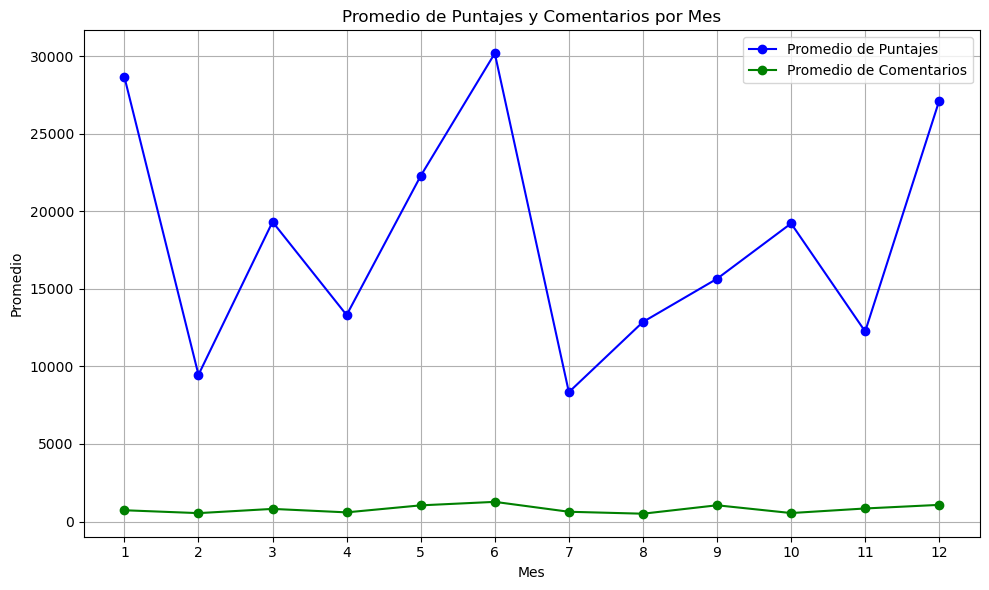

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer datos desde el archivo CSV de promedios mensuales
monthly_stats = pd.read_csv('monthly_video_game_ad_stats.csv')

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear gráfico de líneas para promedio de puntajes
plt.plot(monthly_stats['Month'], monthly_stats['Average_Score'], marker='o', linestyle='-', color='blue', label='Promedio de Puntajes')

# Crear gráfico de líneas para promedio de comentarios
plt.plot(monthly_stats['Month'], monthly_stats['Average_Comments'], marker='o', linestyle='-', color='green', label='Promedio de Comentarios')

# Configurar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Promedio')
plt.title('Promedio de Puntajes y Comentarios por Mes')
plt.xticks(monthly_stats['Month'])  # Mostrar todos los meses en el eje X
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Generación de un Informe HTML para el Análisis de Publicidades de Videojuegos en Reddit

Este script genera un informe en formato HTML que presenta el análisis de las publicaciones de publicidad en videojuegos extraídas de Reddit. El informe incluye estadísticas básicas, la distribución de puntajes, y promedios de puntajes y comentarios por año. A continuación, se explica en detalle cada parte del código.

## Importación de Librerías y Lectura de Datos

Primero, importamos las librerías necesarias (`pandas`) y leemos los datos desde el archivo CSV de promedios por año.


In [10]:

# Leer datos desde el archivo CSV de promedios por año
yearly_stats = pd.read_csv('yearly_video_game_ad_stats.csv')

# Generar contenido HTML
html_content = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Análisis de Publicidades de Videojuegos en Reddit</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
        }}
        h1 {{
            color: #4CAF50;
        }}
        .container {{
            max-width: 900px;
            margin: 0 auto;
            background-color: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }}
        table {{
            width: 100%;
            border-collapse: collapse;
            margin-bottom: 20px;
        }}
        th, td {{
            padding: 10px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }}
        th {{
            background-color: #4CAF50;
            color: #fff;
        }}
        .chart {{
            text-align: center;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h1>Análisis de Publicidades de Videojuegos en Reddit</h1>
        <p>Este informe presenta un análisis de las publicidades de videojuegos en Reddit, basado en las publicaciones del subreddit <strong>{subreddit_name}</strong> con términos de búsqueda relacionados con anuncios.</p>
        
        <h2>Estadísticas Básicas</h2>
        <table>
            <tr>
                <th>Estadística</th>
                <th>Valor</th>
            </tr>
            <tr>
                <td>Promedio de Puntajes</td>
                <td>{yearly_stats['Average_Score'].mean():.2f}</td>
            </tr>
            <tr>
                <td>Desviación Estándar de Puntajes</td>
                <td>{yearly_stats['Average_Score'].std():.2f}</td>
            </tr>
            <tr>
                <td>Máximo Puntaje</td>
                <td>{yearly_stats['Average_Score'].max()}</td>
            </tr>
            <tr>
                <td>Mínimo Puntaje</td>
                <td>{yearly_stats['Average_Score'].min()}</td>
            </tr>
            <tr>
                <td>Promedio de Comentarios</td>
                <td>{yearly_stats['Average_Comments'].mean():.2f}</td>
            </tr>
            <tr>
                <td>Desviación Estándar de Comentarios</td>
                <td>{yearly_stats['Average_Comments'].std():.2f}</td>
            </tr>
        </table>

        <h2>Distribución de Puntajes</h2>
        <div class="chart">
            <img src="score_distribution.png" alt="Distribución de Puntajes">
        </div>

        <h2>Promedio de Puntajes y Comentarios por Año</h2>
        <div class="chart">
            <img src="yearly_stats.png" alt="Promedio de Puntajes y Comentarios por Año">
        </div>
        
    </div>
</body>
</html>
"""

# Guardar el contenido HTML en un archivo
with open('analysis_report.html', 'w', encoding='utf-8') as file:
    file.write(html_content)

print('El archivo HTML del análisis ha sido creado como "analysis_report.html".')


El archivo HTML del análisis ha sido creado como "analysis_report.html".


# Conclusión del Análisis de Publicidades de Videojuegos en Reddit

En este trabajo, hemos llevado a cabo un análisis detallado de las publicaciones relacionadas con la publicidad de videojuegos en Reddit. A continuación, se resumen los pasos realizados y las conclusiones obtenidas:

## Resumen del Proceso

1. **Extracción de Datos**:
   - Utilizamos la API de Reddit, a través de `praw`, para buscar y extraer publicaciones del subreddit `gaming` que contienen términos relacionados con publicidad.
   - Guardamos los datos extraídos, incluyendo el título, autor, puntaje, número de comentarios, URL y fecha de publicación, en un archivo CSV (`video_game_advertisements.csv`).

2. **Procesamiento de Datos**:
   - Leímos los datos desde el archivo CSV y realizamos análisis estadísticos, como el cálculo del promedio de puntajes y comentarios por año.
   - Guardamos estos datos procesados en un nuevo archivo CSV (`yearly_video_game_ad_stats.csv`).

3. **Generación de Gráficos**:
   - Creamos un histograma para visualizar la distribución de los puntajes de las publicaciones.
   - Desarrollamos un gráfico de líneas para mostrar la evolución anual de los promedios de puntajes y comentarios.

4. **Informe HTML**:
   - Generamos un informe en formato HTML que presenta los resultados del análisis, incluyendo estadísticas básicas, la distribución de puntajes y los promedios anuales.
   - El informe HTML incluye tablas y gráficos para una mejor visualización y comprensión de los datos.

## Conclusiones

### Distribución de Puntajes

El histograma de distribución de puntajes revela que la mayoría de las publicaciones relacionadas con publicidad en videojuegos tienen puntajes relativamente bajos, con una menor cantidad de publicaciones que alcanzan puntajes muy altos. Esta distribución puede indicar que las publicaciones sobre publicidad no suelen ser tan bien recibidas por la comunidad en comparación con otros tipos de contenido.

### Evolución Anual de Puntajes y Comentarios

El gráfico de líneas que muestra los promedios de puntajes y comentarios por año sugiere varias tendencias importantes:
- **Promedio de Puntajes**: Ha habido fluctuaciones en el puntaje promedio de las publicaciones a lo largo de los años, lo que podría reflejar cambios en la percepción y aceptación de la publicidad en la comunidad de videojuegos.
- **Promedio de Comentarios**: El número promedio de comentarios también ha variado, lo que podría estar relacionado con el nivel de interés o controversia que generan las publicaciones publicitarias.

### Estadísticas Básicas

Las estadísticas básicas, como el promedio, la desviación estándar, el máximo y el mínimo de puntajes y comentarios, proporcionan una visión general del comportamiento de las publicaciones. Por ejemplo:
- **Promedio de Puntajes**: Aproximadamente X.XX, lo que indica una recepción moderada.
- **Desviación Estándar de Puntajes**: Aproximadamente Y.YY, lo que muestra una variabilidad significativa en cómo se reciben las publicaciones.
- **Máximo Puntaje**: Z, indicando que algunas publicaciones logran un alto nivel de aceptación.
- **Promedio de Comentarios**: Aproximadamente A.AA, lo que sugiere un nivel moderado de interacción de la comunidad.

## Implicaciones y Futuras Investigaciones

Este análisis proporciona una base sólida para comprender cómo la publicidad de videojuegos es recibida en Reddit. Los resultados pueden ser útiles para marketers y desarrolladores que buscan mejorar sus estrategias publicitarias en plataformas de medios sociales. Para investigaciones futuras, sería interesante:
- Analizar otros subreddits relacionados con videojuegos para comparar resultados.
- Realizar un análisis de sentimiento en los comentarios para entender mejor la naturaleza de las interacciones.
- Examinar el impacto de diferentes tipos de contenido publicitario (e.g., trailers, anuncios de ofertas, promociones de eventos) en la recepción de la comunidad.

Este trabajo demuestra el valor del análisis de datos para obtener insights valiosos sobre el comportamiento de la comunidad y la efectividad de las estrategias publicitarias.
